In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
df_biker = pd.read_pickle('../data/sdd/filter/agent_type/Biker.pkl')
df_ped =pd.read_pickle('../data/sdd/filter/agent_type/Pedestrian.pkl')

In [5]:
df_biker.shape, df_ped.shape

((103040, 9), (297200, 9))

In [6]:
df_biker.shape[0]/20, df_ped.shape[0]/20

(5152.0, 14860.0)

/tmp/ipykernel_37701/173209707.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))


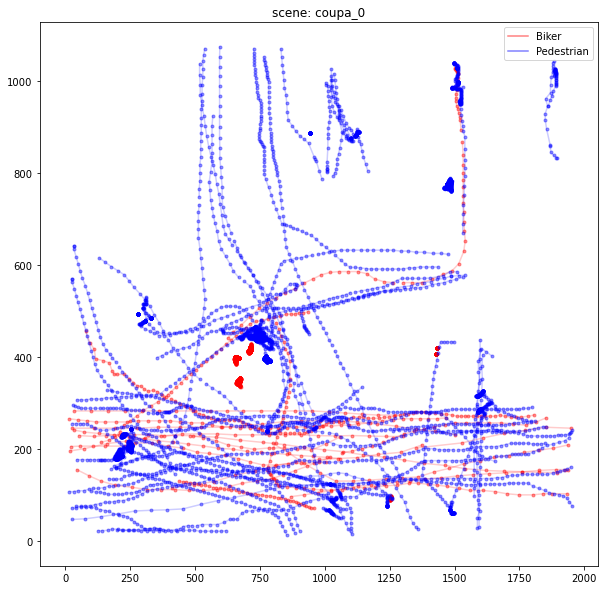

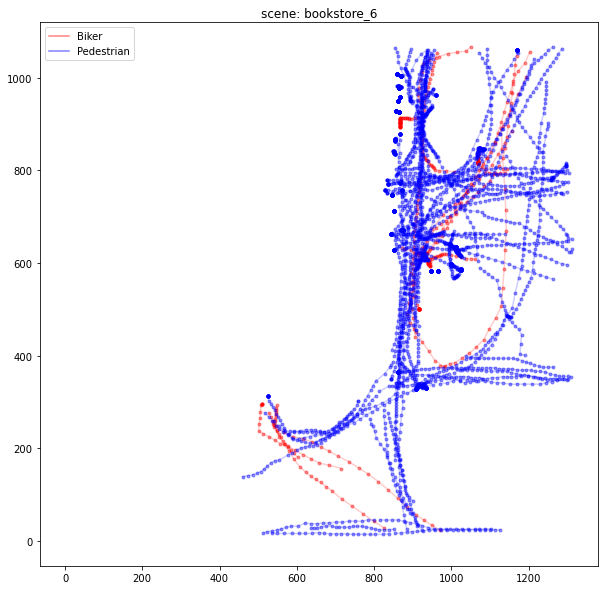

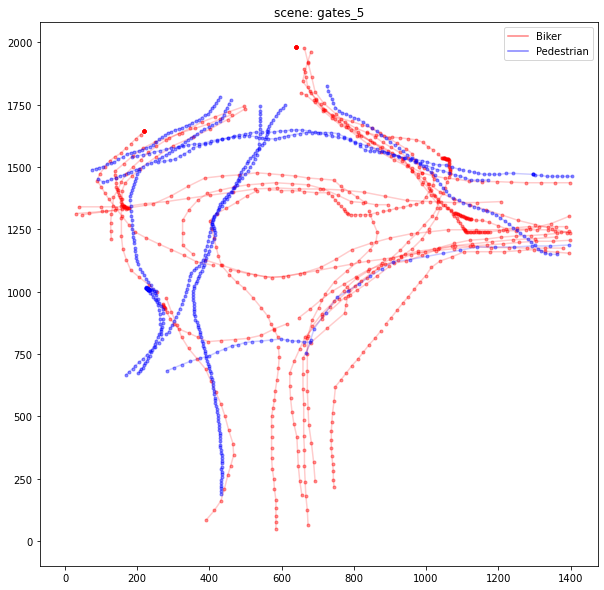

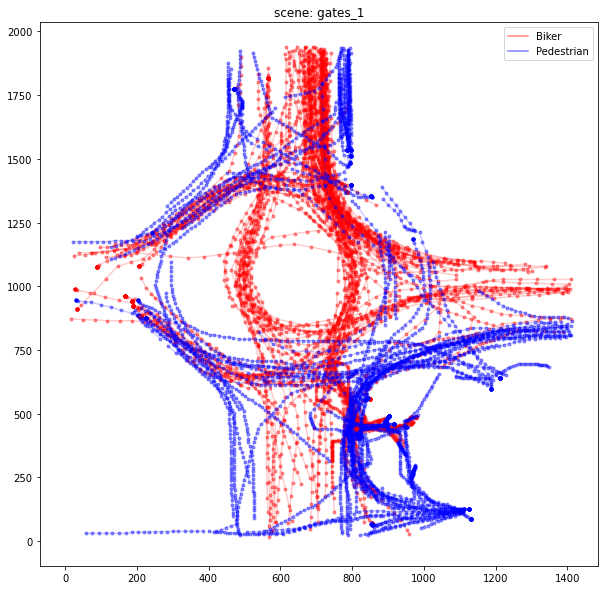

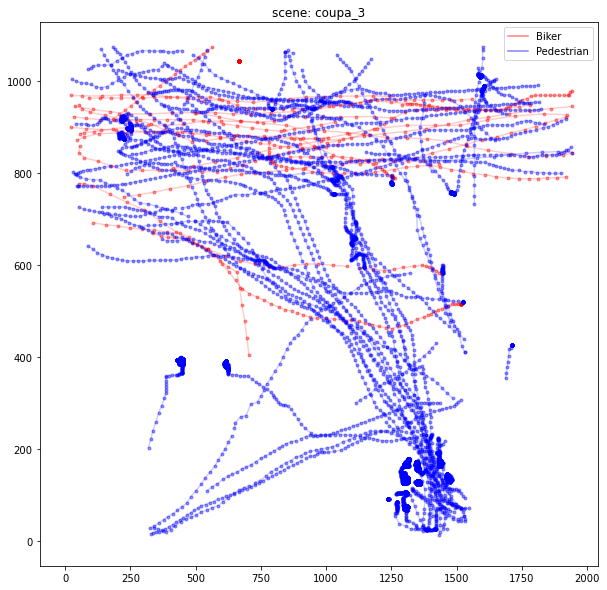

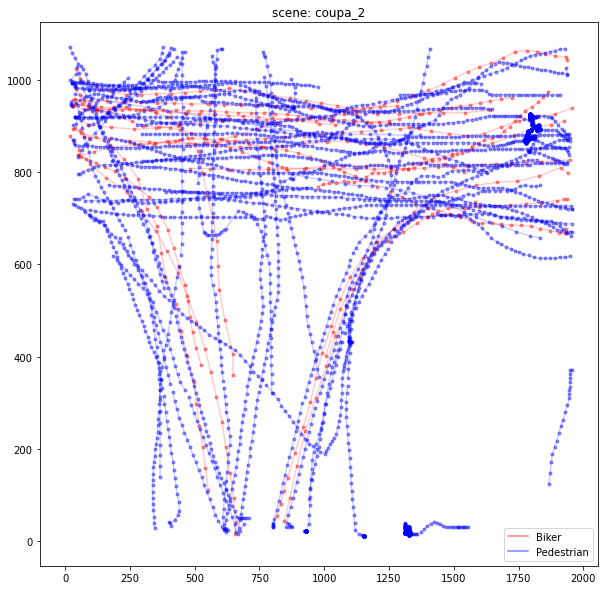

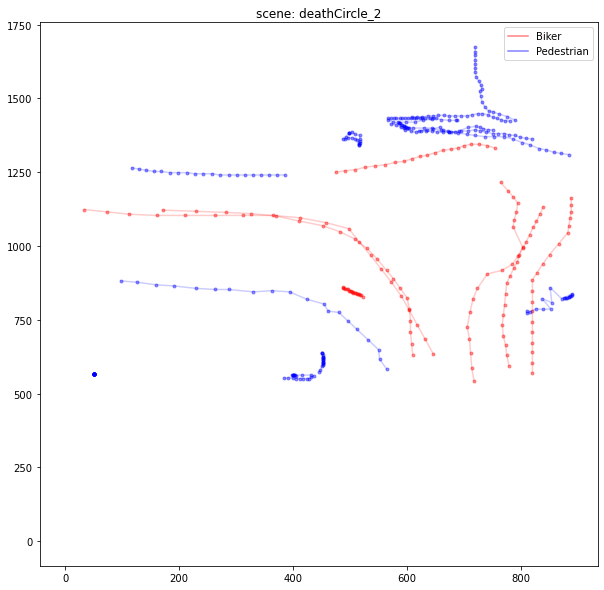

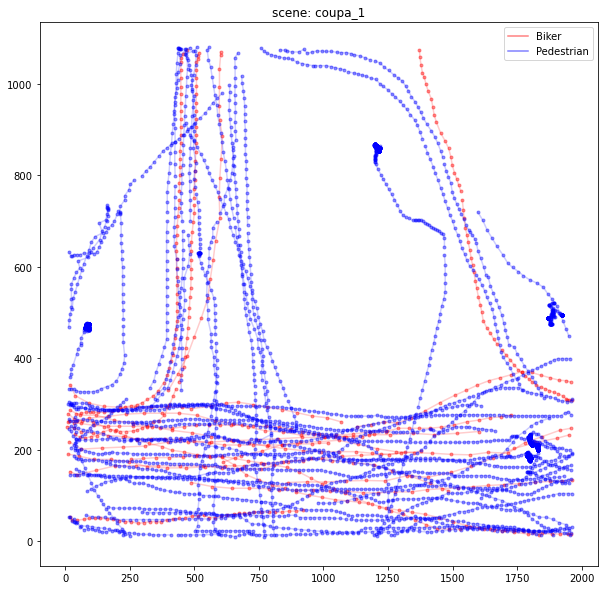

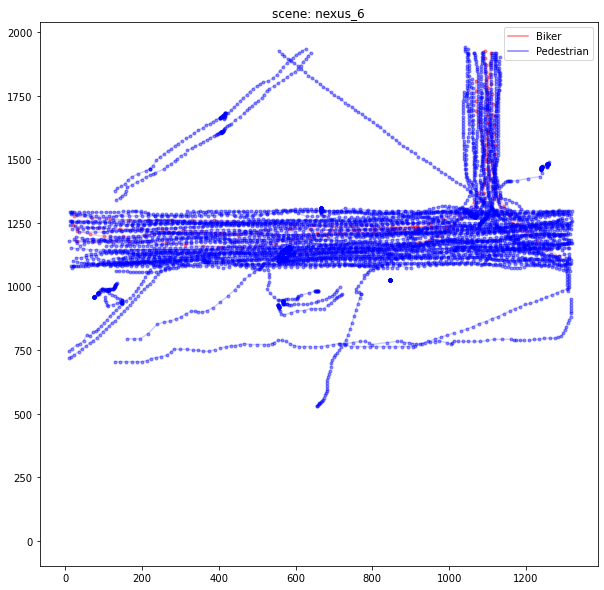

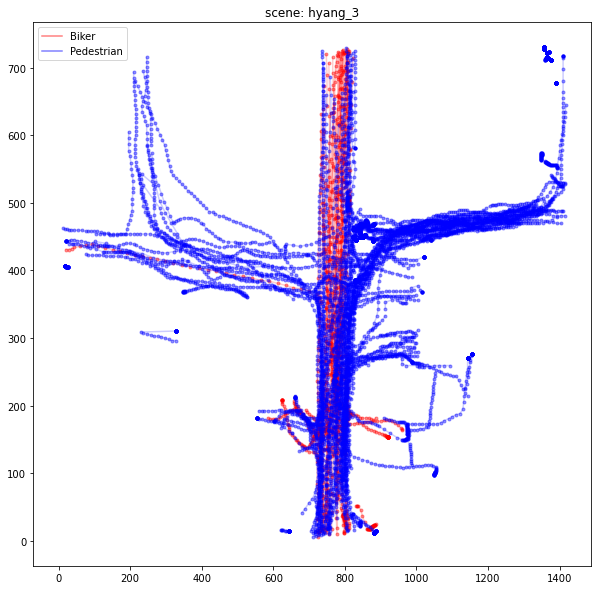

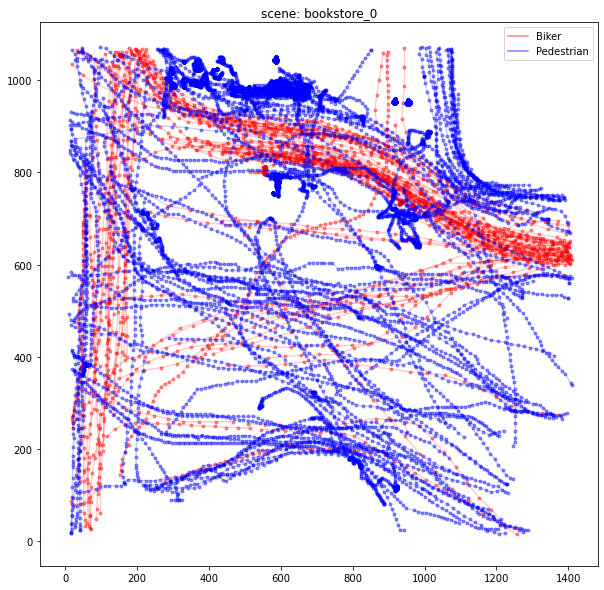

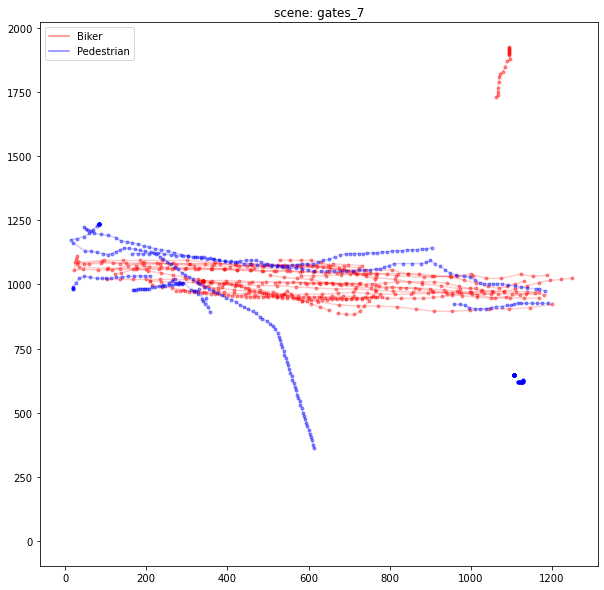

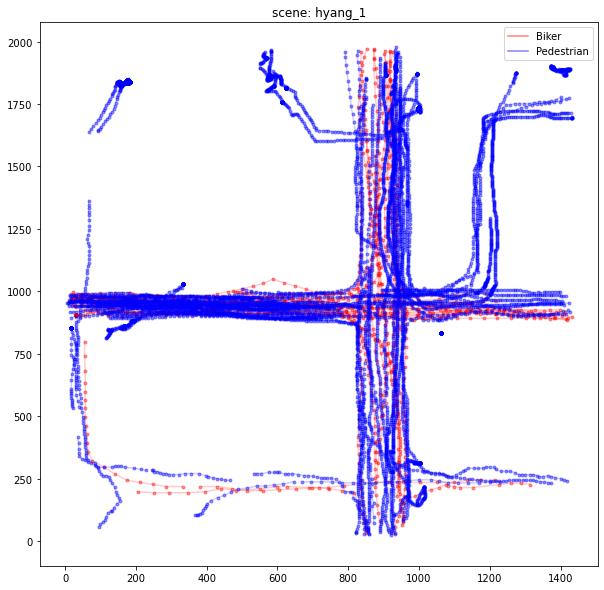

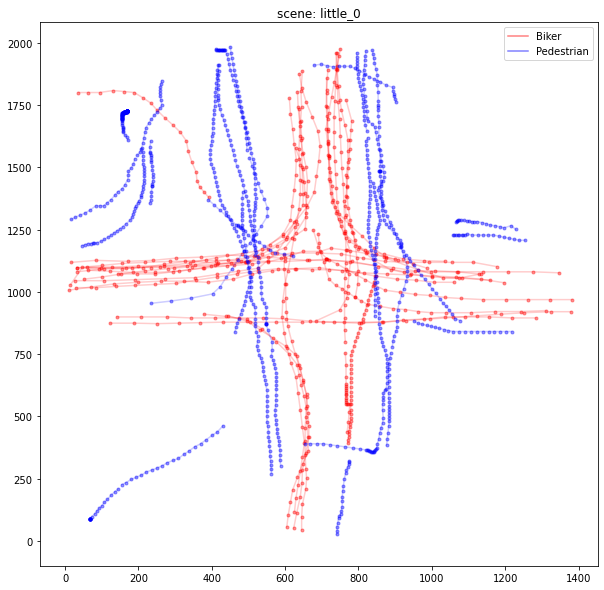

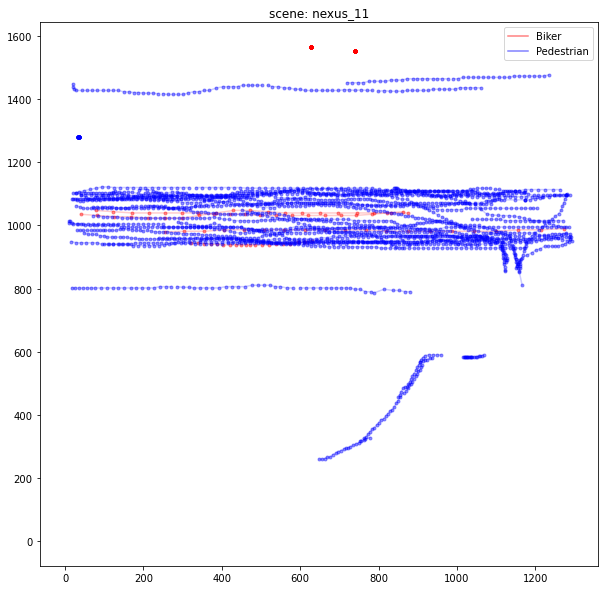

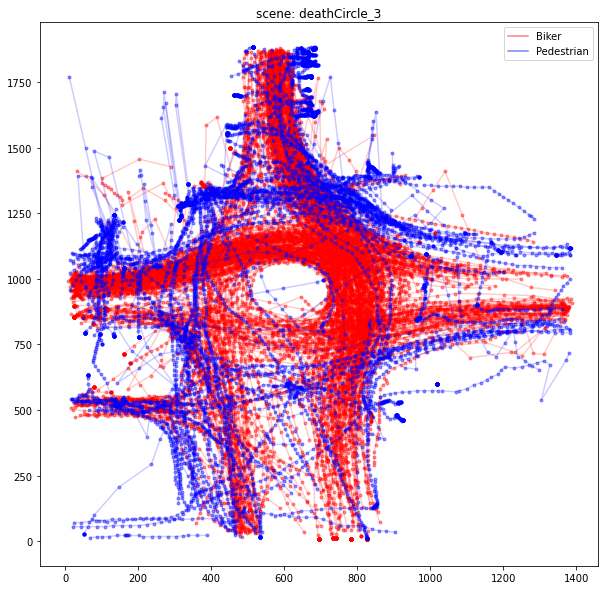

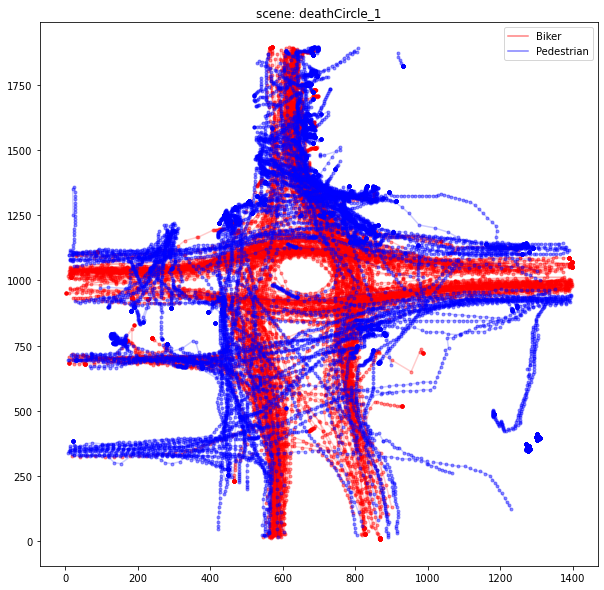

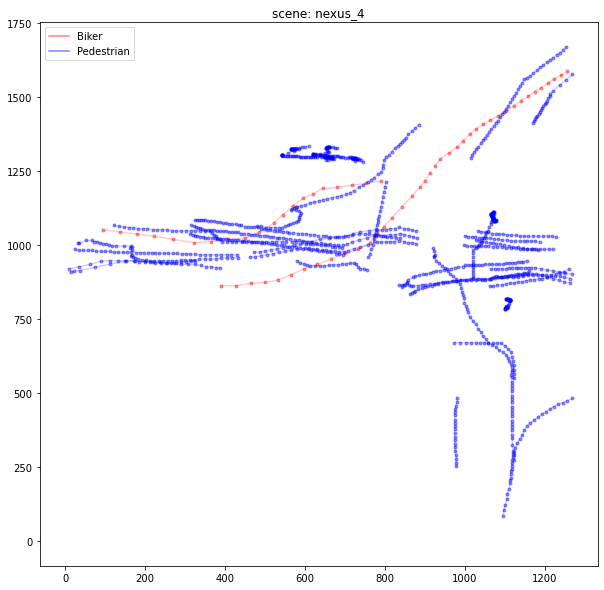

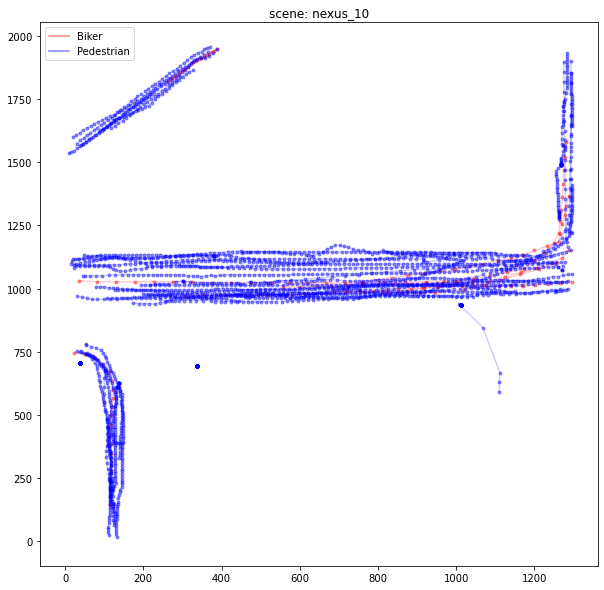

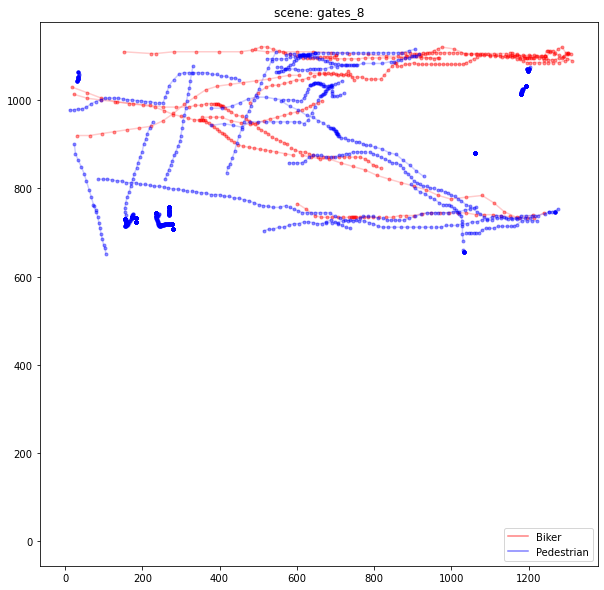

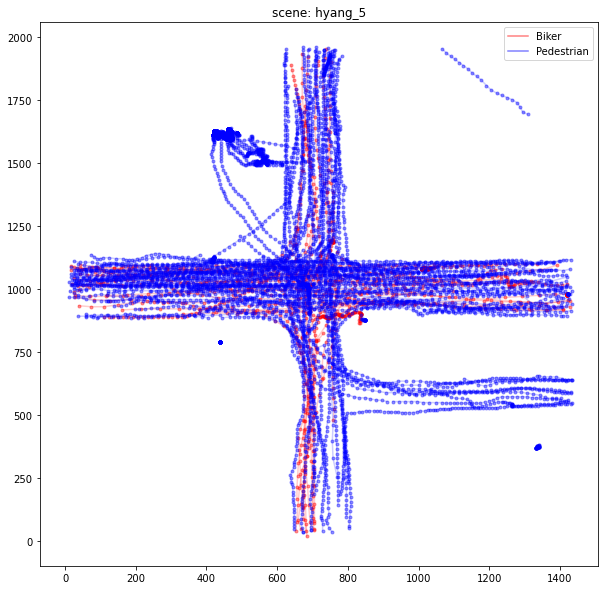

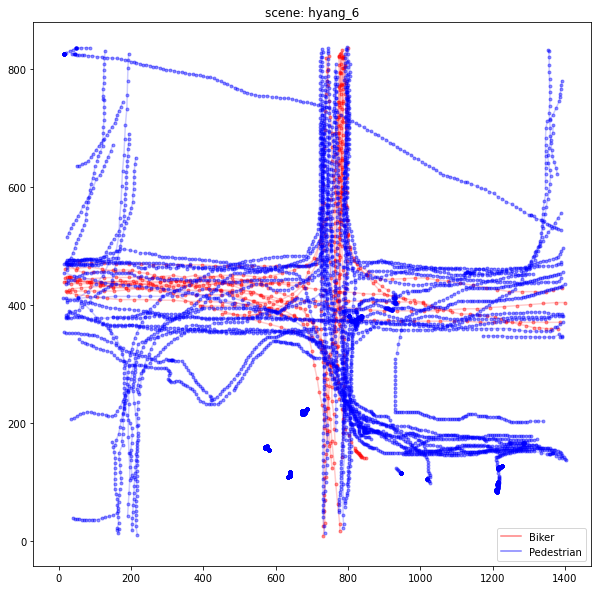

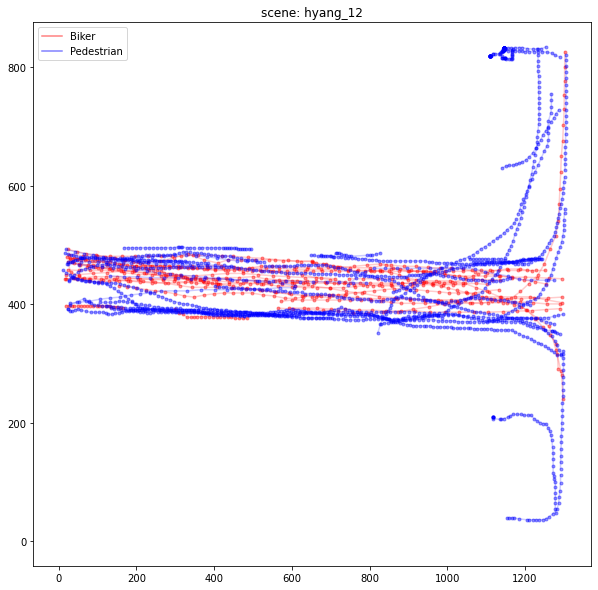

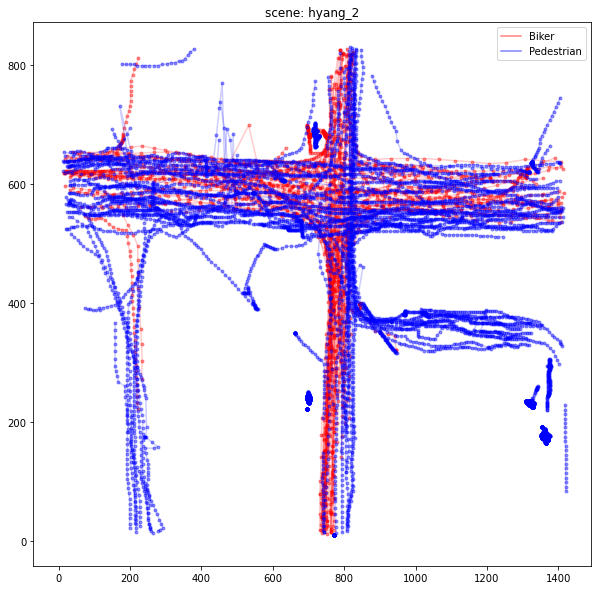

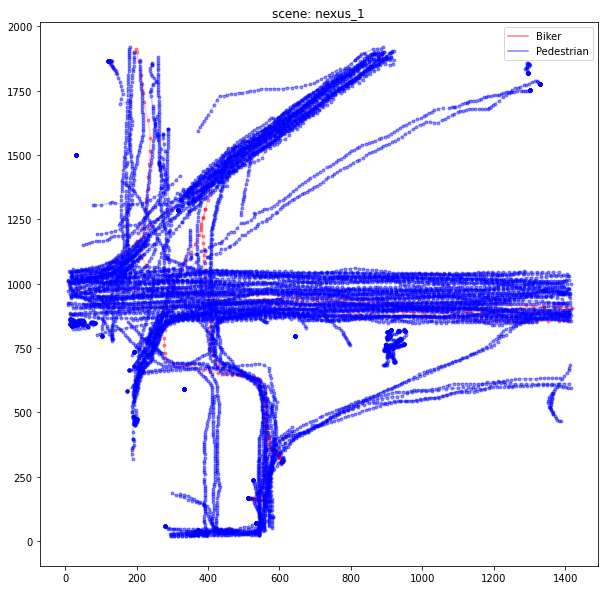

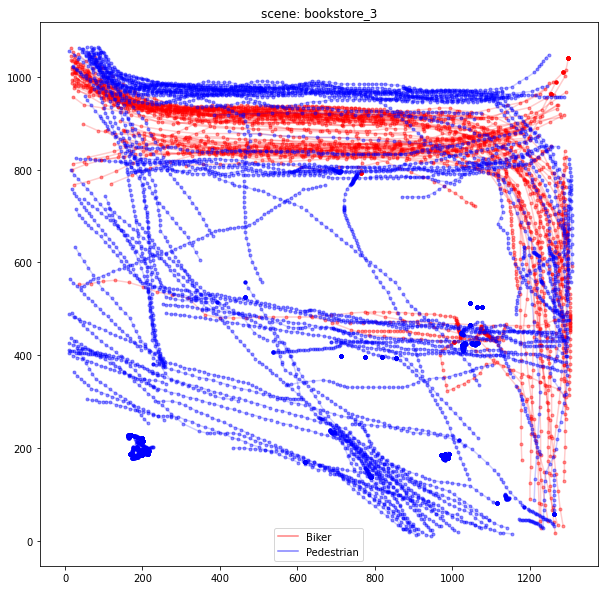

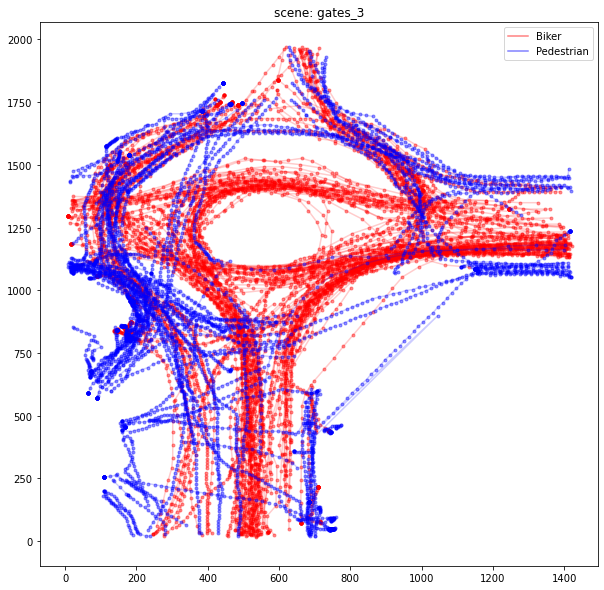

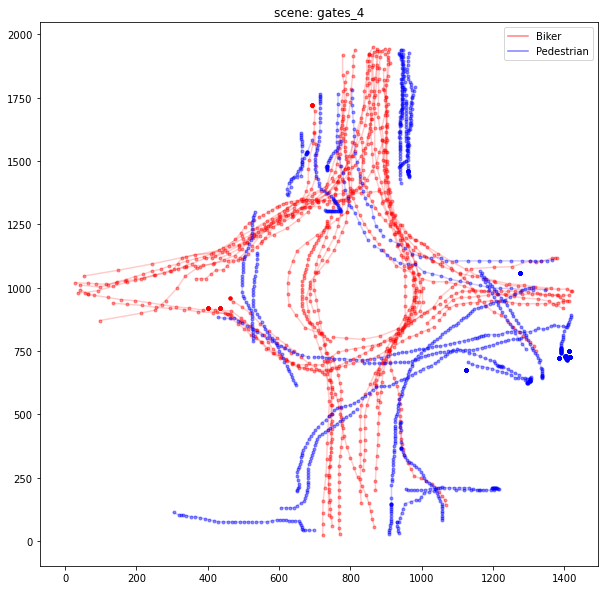

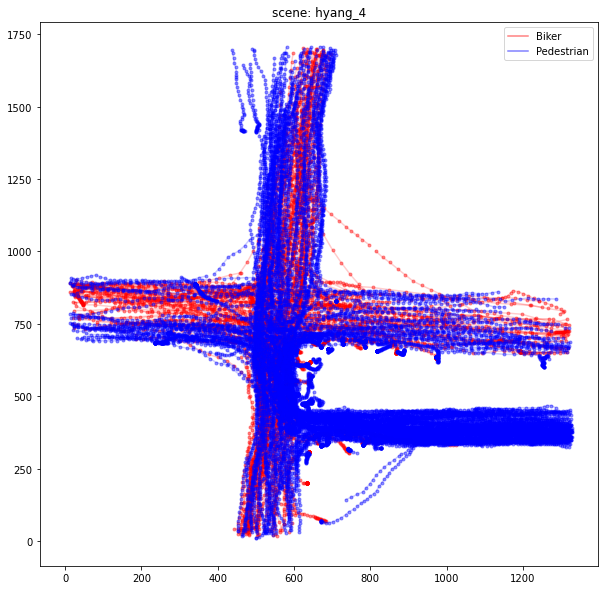

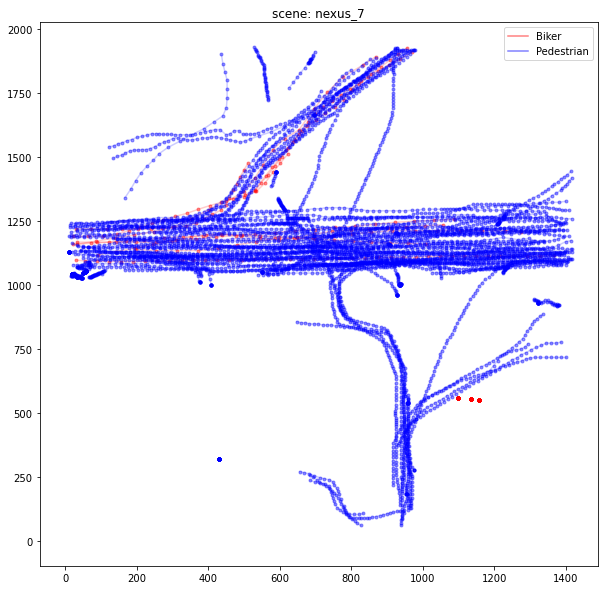

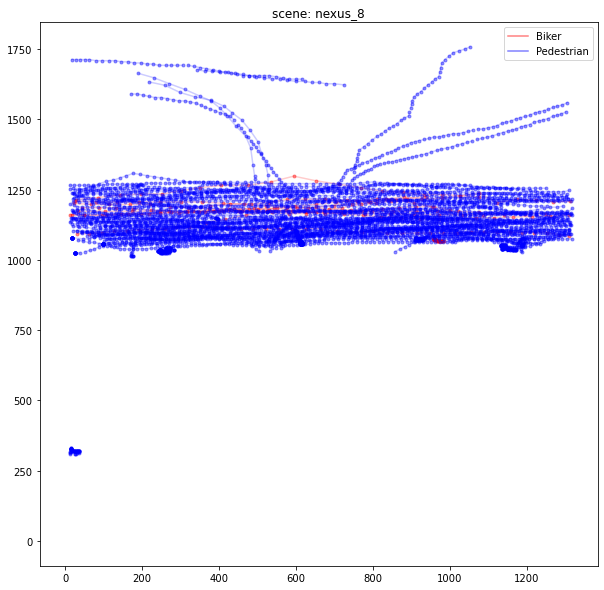

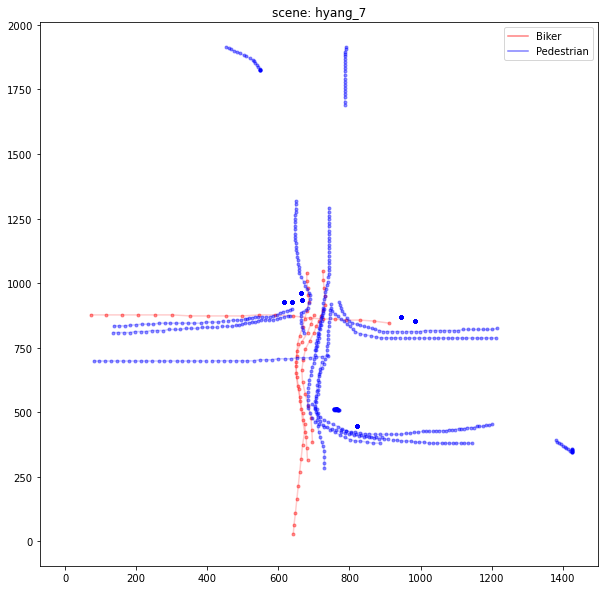

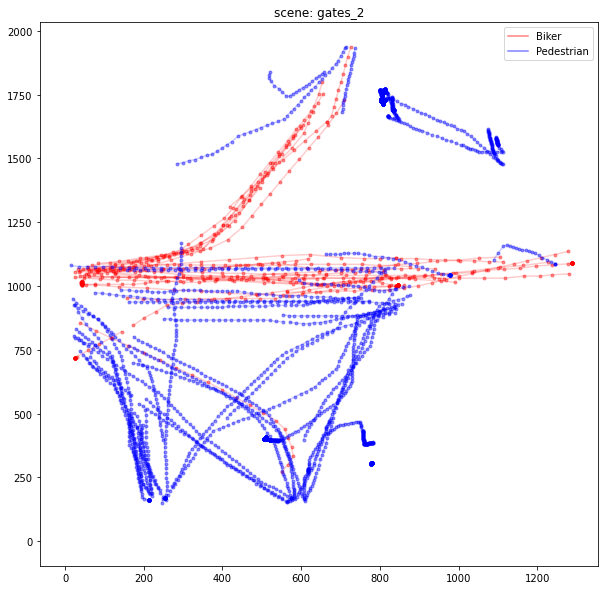

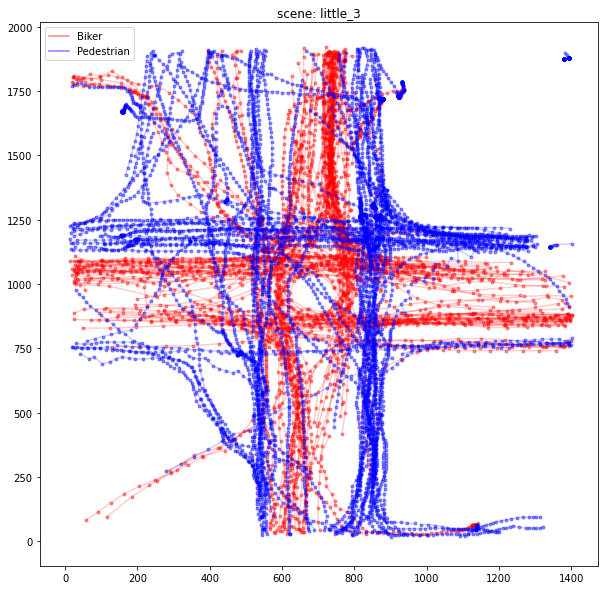

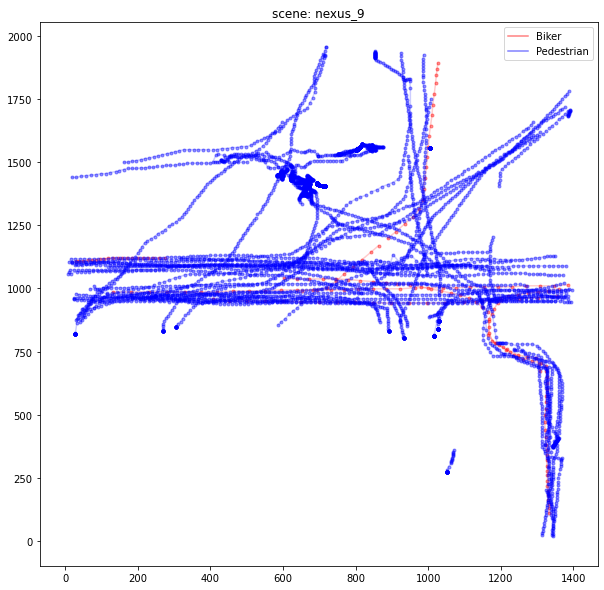

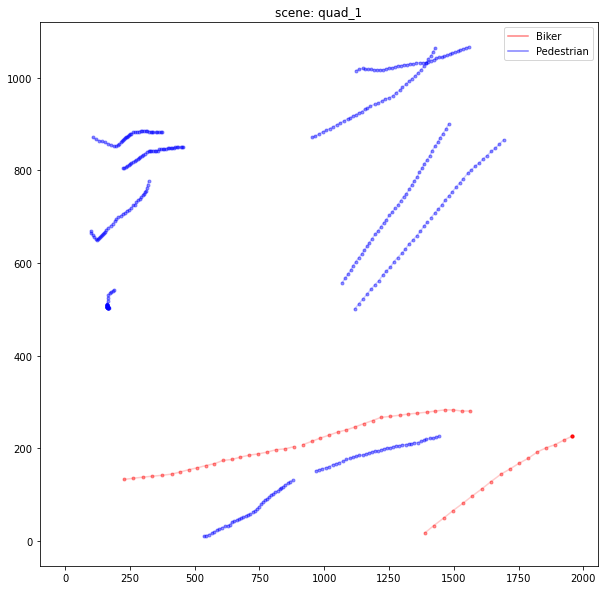

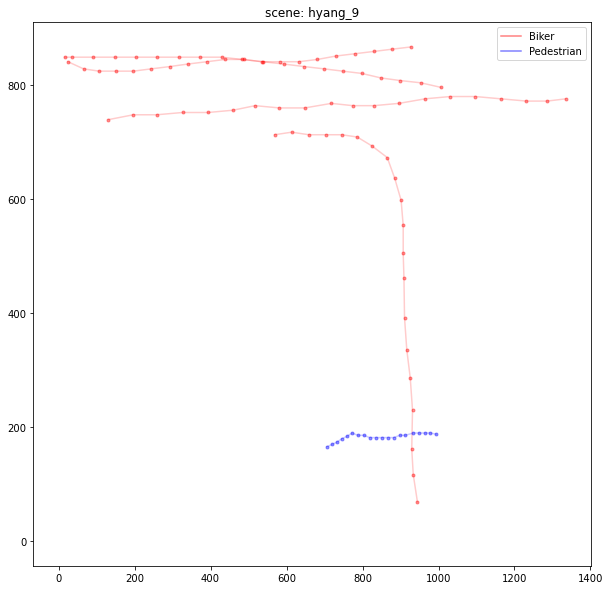

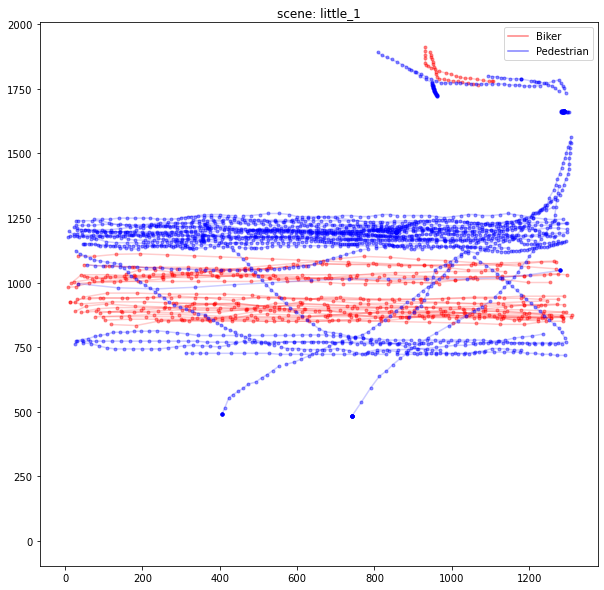

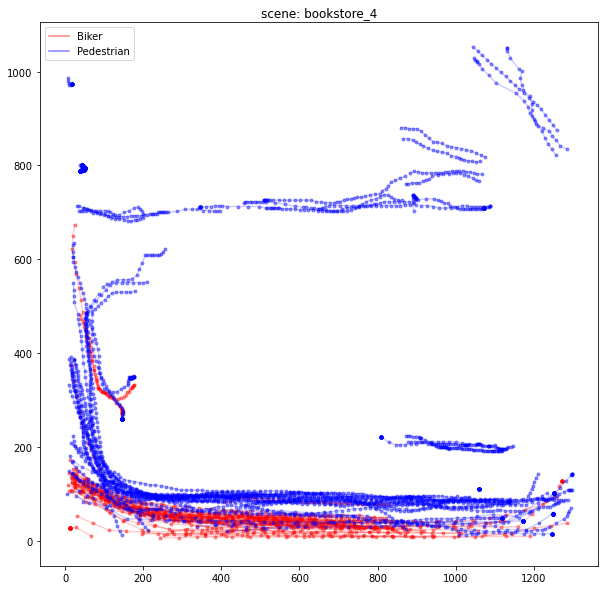

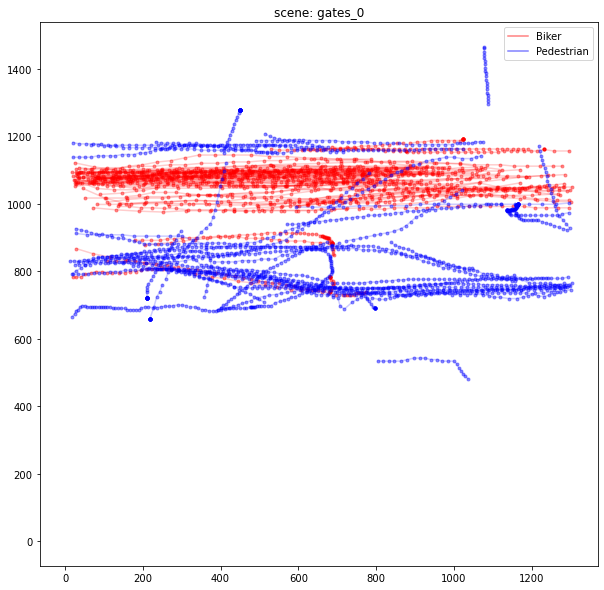

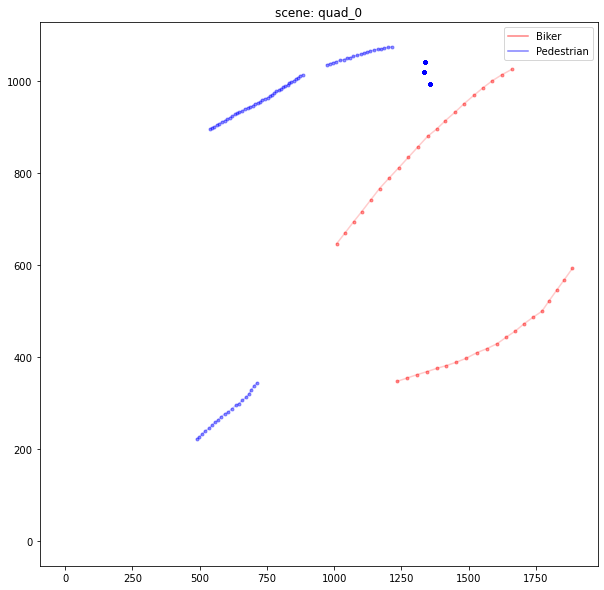

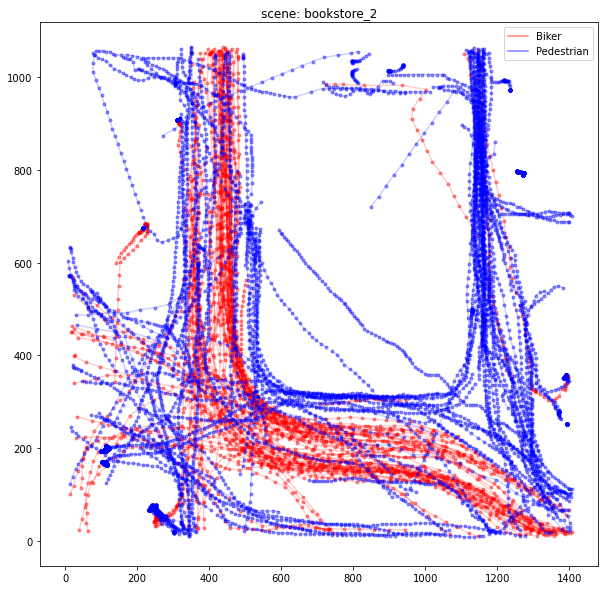

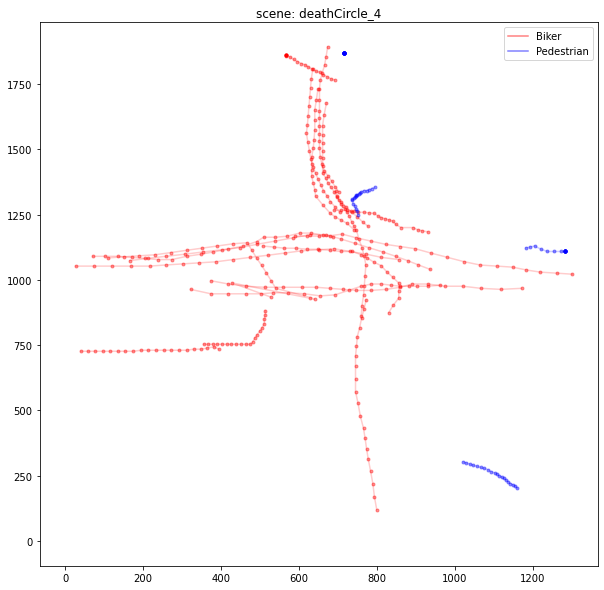

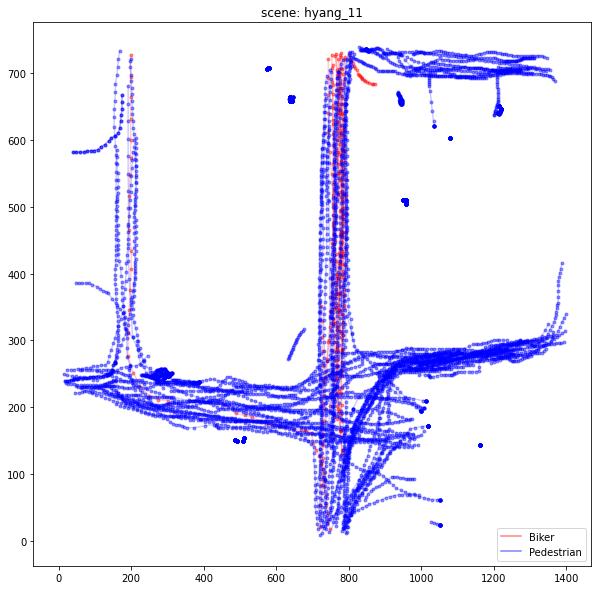

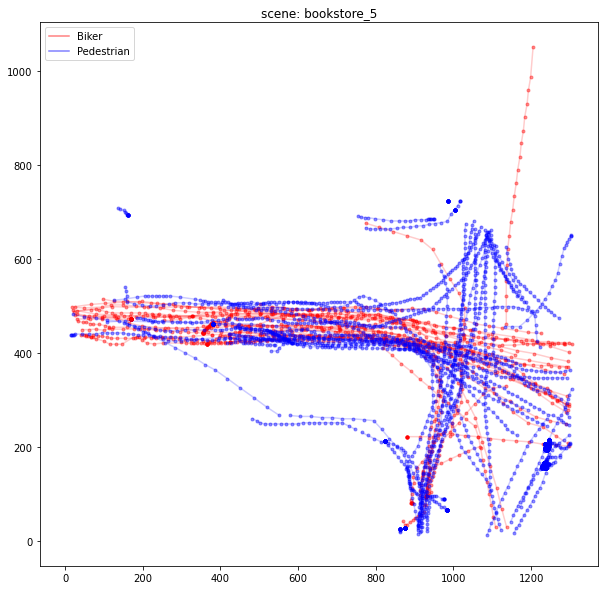

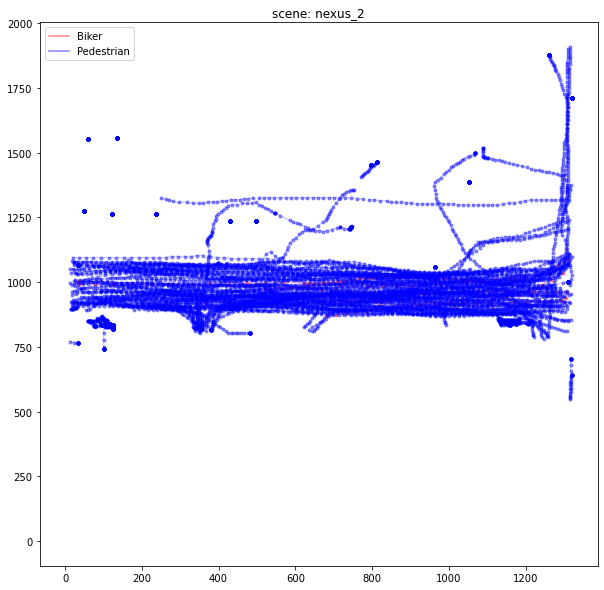

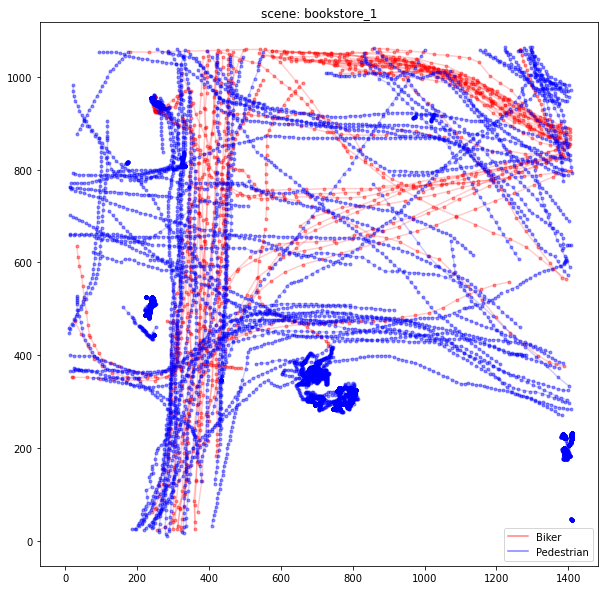

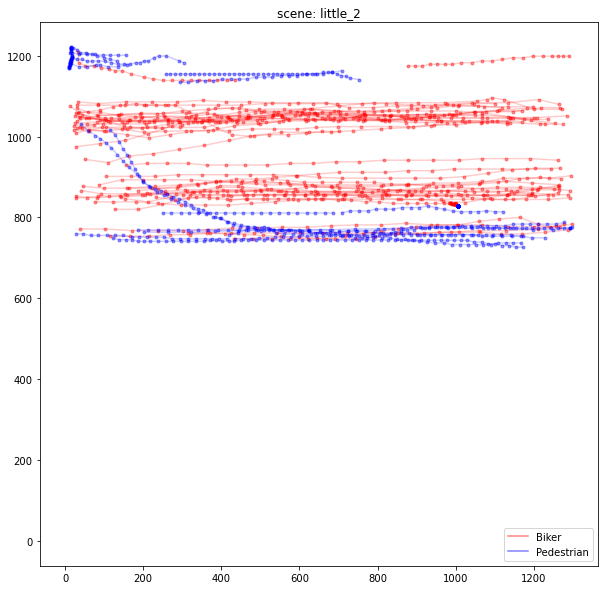

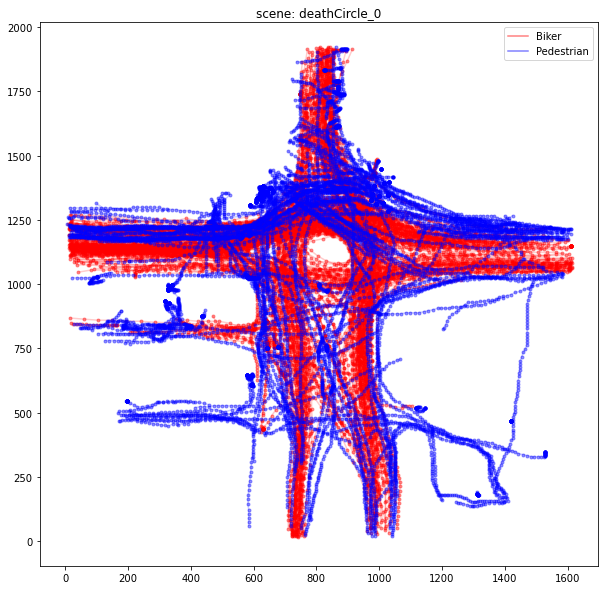

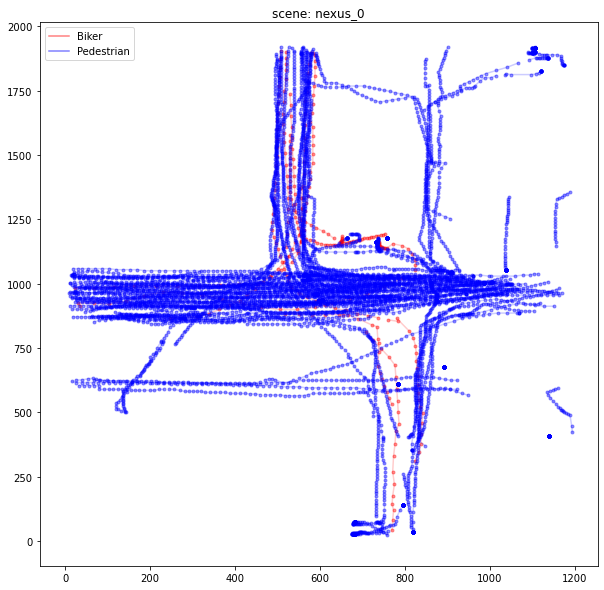

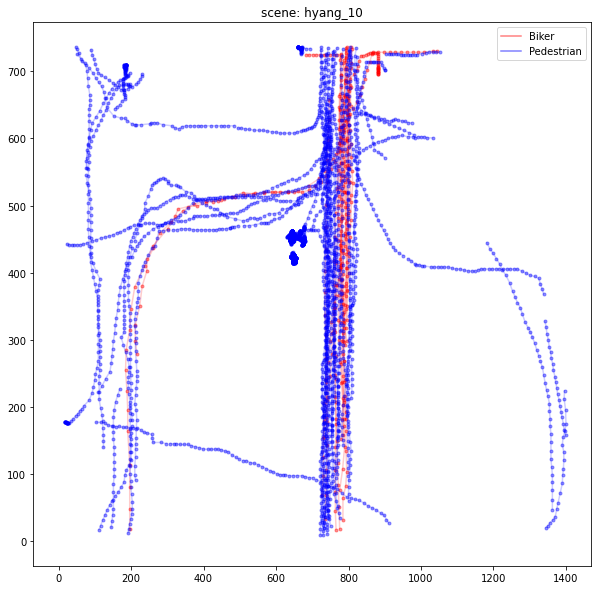

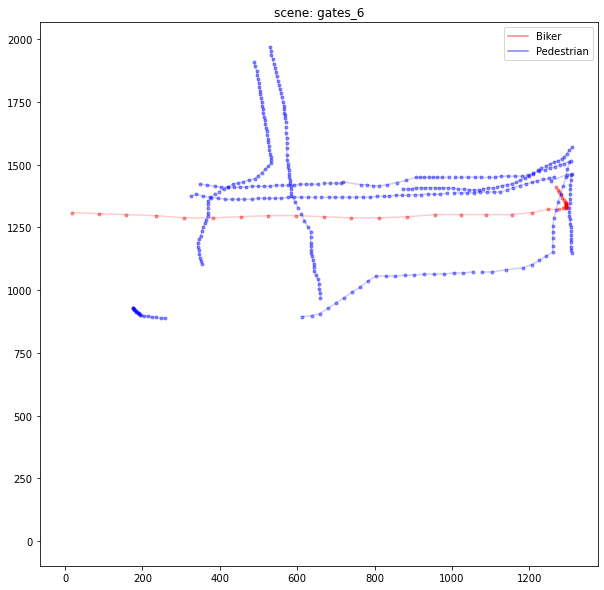

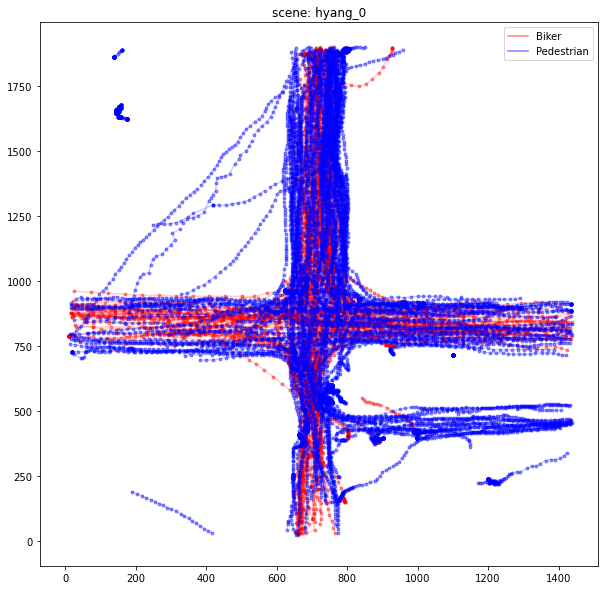

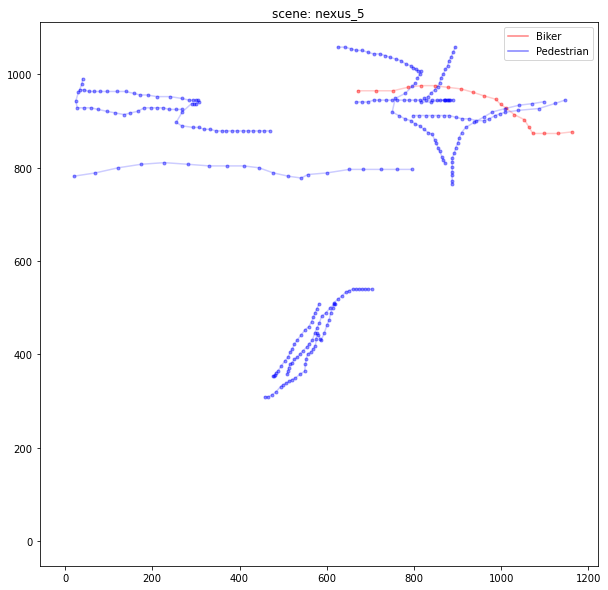

In [29]:
for scene_id in list(set(df_biker.sceneId.unique()).intersection(set(df_ped.sceneId.unique()))):
    scene_biker = df_biker[df_biker.sceneId == scene_id]
    scene_ped = df_ped[df_ped.sceneId == scene_id]

    fig = plt.figure(figsize=(10,10))
    for i, traj in scene_biker.groupby('metaId'):
        plt.plot(traj.x, traj.y, 'r.', alpha=0.4)
        plt.plot(traj.x, traj.y, 'r-', alpha=0.2)
    plt.plot(0,0,'r-', alpha=0.5, label='Biker')

    for i, traj in scene_ped.groupby('metaId'):
        plt.plot(traj.x, traj.y, 'b.', alpha=0.4)
        plt.plot(traj.x, traj.y, 'b-', alpha=0.2)
    plt.plot(0,0,'b-', alpha=0.5, label='Pedestrian')

    plt.plot(0,0,'w')
    plt.title(f'scene: {scene_id}')
    plt.legend(loc='best')
    plt.savefig(f'../figures/scene_traj_viz/{scene_id}.png')
    plt.close(fig)

In [1]:
import torch
import torch.nn as nn

In [8]:
stages = nn.ModuleList()
stages.append(
    nn.Sequential(
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
        nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True)
        ), 
        nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True)
        )
    )
)

ModuleList(
  (0): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Sequential(
      (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
  )
)

In [10]:
for i in stages:
    print(i)

Sequential(
  (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (1): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (2): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
)


In [11]:
stages[0]

Sequential(
  (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (1): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (2): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
)